### Spatial distribution of the change of CDHs
    
Written by Gesangyangji; last updated Dec 11, 2020 <br>


In [1]:
import matplotlib   
import matplotlib.pyplot as plt 
from matplotlib import cm
import matplotlib as mpl
from matplotlib import *
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import numpy as np                  
import pandas as pd 
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings

from loadingdata import getvarsfordecades
from loadingdata import csv2dict


In [2]:
warnings.filterwarnings("ignore")

#### Step 1:  Load data

In [3]:
yrstr = ['2011_2030','2021_2040','2031_2050','2041_2060','2051_2070','2061_2080','2071_2090','2081_2100']; 
CityLname = ['MADISON','CHICAGO','ATLANTA','BOSTON', 'DALLAS', 'MIAMI', 'HOUSTON','NASHVILLE','OMAHA', 
             'STLOUIS', 'COLUMBUS','MINNEAPOLIS','NEWYORK', 'RALEIGH', 'WASHINGTONDC'] 
CitySname = ['MSN','MDW','ATL','BOS','DFW','MIA','IAH','BNA','OMA',
             'STL','CMH','MSP','JFK','RDU','IAD']

In [4]:
# check what vars are in the file
rawdata = csv2dict('MADISON', '2011_2030', 'rcp45') # data for different cities, scens,decades are in the same format
rawdata.keys()

dict_keys(['m', 'db1', 'db2', 'ws1', 'mdb1', 'ws2', 'mdb2', 'mws1', 'mwd1', 'x', 'mrange', 'mws3', 'mwd3', 'db', 'mcwb', 'wb', 'mcdb', 'extreme_max_wb', 'dp', 'hr', 'mcdb_dp', 'enthalpy', 'mcdb_enth', 'extreme_ws', 'mean_min', 'mean_max', 'sd_min', 'sd_max', 'T_n_min', 'T_n_max', 'Annual_Tavg', 'Tavg', 'Sd', 'Annual_HDD_10', 'HDD_10', 'Annual_HDD_183', 'HDD_183', 'Annual_CDD_10', 'CDD_10', 'Annual_CDD_183', 'CDD_183', 'Annual_CDH_233', 'CDH_233', 'Annual_CDH_267', 'CDH_267', 'M_DB_Range', 'Monthly_DB_db', 'Monthly_DB_wb', 'Monthly_WB_db', 'Monthly_WB_wb', 'mo_db_04', 'mo_mcwb_04', 'mo_db_2', 'mo_mcwb_2', 'mo_db_5', 'mo_mcwb_5', 'mo_db_10', 'mo_mcwb_10', 'mo_wb_04', 'mo_mcdb_04', 'mo_wb_2', 'mo_mcdb_2', 'mo_wb_5', 'mo_mcdb_5', 'mo_wb_10', 'mo_mcdb_10', 'hours8_4'])

In [5]:
# select ur target var,scen, and load the data
df45_cdh1 = getvarsfordecades(CityLname,yrstr,'Annual_CDH_233','rcp45')
df85_cdh1 = getvarsfordecades(CityLname,yrstr,'Annual_CDH_233','rcp85')

df45_cdh2 = getvarsfordecades(CityLname,yrstr,'Annual_CDH_267','rcp45')
df85_cdh2 = getvarsfordecades(CityLname,yrstr,'Annual_CDH_267','rcp85')

# laoding heating degree days
df45_hdd1 = getvarsfordecades(CityLname,yrstr,'Annual_HDD_10','rcp45')
df85_hdd1 = getvarsfordecades(CityLname,yrstr,'Annual_HDD_10','rcp85')

df45_hdd2 = getvarsfordecades(CityLname,yrstr,'Annual_HDD_183','rcp45')
df85_hdd2 = getvarsfordecades(CityLname,yrstr,'Annual_HDD_183','rcp85')


df85_hdd2

,city,lat,lon,2011_2030,2021_2040,2031_2050,2041_2060,2051_2070,2061_2080,2071_2090,2081_2100
0,MADISON,43.14N,89.35W,[3621.110584],[3479.552889],[3324.976047],[3148.956493],[2953.578628],[2760.343970],[2594.538603],[2444.854472]
1,MINNEAPOLIS,44.88N,93.23W,[3829.010010],[3682.960618],[3526.119566],[3349.185184],[3151.226429],[2950.830939],[2778.425252],[2626.616163]
2,WASHINGTONDC,38.94N,77.45W,[2386.972437],[2286.473901],[2171.847721],[2039.629985],[1901.516698],[1774.494092],[1666.449981],[1561.142125]
3,MIAMI,25.82N,80.3W,[46.924274],[38.350613],[29.501085],[22.434240],[16.659935],[11.505775],[8.257269],[6.002980]
4,COLUMBUS,39.99N,82.88W,[2673.888762],[2561.196995],[2431.364128],[2282.050890],[2121.666431],[1972.981370],[1847.963425],[1729.954368]
5,STLOUIS,38.75N,90.37W,[2227.599481],[2124.396251],[2013.486491],[1888.291666],[1746.749533],[1609.101369],[1498.717189],[1398.168574]
6,RALEIGH,35.87N,78.79W,[1645.220736],[1564.072667],[1468.845687],[1361.965618],[1252.169648],[1149.590080],[1064.949216],[984.455949]
7,NASHVILLE,36.12N,86.69W,[1752.799023],[1664.178171],[1566.599102],[1456.644395],[1337.420663],[1224.663240],[1134.447654],[1050.309563]
8,ATLANTA,33.64N,84.43W,[1340.839166],[1270.365007],[1191.283987],[1103.700673],[1011.079239],[923.393189],[851.861667],[784.845288]
9,BOSTON,42.36N,71.01W,[2837.556731],[2707.776289],[2565.331749],[2404.846222],[2231.745358],[2071.138768],[1936.560759],[1800.881342]


#### Step 2: Preparing data for plotting 
The main work here is to calculate the percentage change of variables by mid and late century.

In [6]:
# some usful functions
def str2num_latlon(oldlist):
    newlist = []
    for val in oldlist:
        newlist.append(float(val[:-1]))
    return newlist

def str2num(decade):
    newlist = []
    for val in decade:
        newlist.append(int(round(float(val[0]),2))) 
    return newlist

def flip(lst):
    return [ -i for i in lst ] 

def perctchange(list1,list2):
    changelst = []
    for i in range(len(list1)):
        perc_diff = (list2[i]-list1[i])/list1[i]
        changelst.append(round(perc_diff*100,2))
    return changelst 

def df_with_percentchange(list1, list2, list3):
    data_pres = str2num(list1)
    data_mid = str2num(list2)
    data_late = str2num(list3)
    prechange_mid = perctchange(data_pres,data_mid)
    prechange_late = perctchange(data_pres,data_late)
    dplot = pd.DataFrame({'2020':data_pres,'2050':data_mid,'2090':data_late,
                            '2020-2050':prechange_mid,'2020-2090':prechange_late})
    return dplot

In [7]:
# subset data
city = df45_cdh1['city']
lat = str2num_latlon(list(df45_cdh1['lat']))
lon = flip(str2num_latlon(list(df45_cdh1['lon'])))
dfgeo = pd.DataFrame({'city':city,'lat':lat,'lon':lon})

# creat new df for each variable, each scenario 
df = df_with_percentchange(list(df45_cdh1['2011_2030']),list(df45_cdh1['2041_2060']),list(df45_cdh1['2081_2100']))
new_df45_cdh1 = pd.merge(dfgeo,df,right_index=True,left_index=True)

df = df_with_percentchange(list(df45_cdh2['2011_2030']),list(df45_cdh2['2041_2060']),list(df45_cdh2['2081_2100']))
new_df45_cdh2 = pd.merge(dfgeo,df,right_index=True,left_index=True)

df = df_with_percentchange(list(df85_cdh1['2011_2030']),list(df85_cdh1['2041_2060']),list(df85_cdh1['2081_2100']))
new_df85_cdh1 = pd.merge(dfgeo,df,right_index=True,left_index=True)

df = df_with_percentchange(list(df85_cdh2['2011_2030']),list(df85_cdh2['2041_2060']),list(df85_cdh2['2081_2100']))
new_df85_cdh2 = pd.merge(dfgeo,df,right_index=True,left_index=True)
new_df85_cdh2

,city,lat,lon,2020,2050,2090,2020-2050,2020-2090
0,MADISON,43.14,-89.35,1561,3055,7551,95.71,383.73
1,MINNEAPOLIS,44.88,-93.23,1894,3558,8322,87.86,339.39
2,WASHINGTONDC,38.94,-77.45,3817,6812,14458,78.46,278.78
3,MIAMI,25.82,-80.30,11157,20066,40643,79.85,264.28
4,COLUMBUS,39.99,-82.88,2574,4625,10430,79.68,305.21
5,STLOUIS,38.75,-90.37,5440,8706,16708,60.04,207.13
6,RALEIGH,35.87,-78.79,5163,9014,18795,74.59,264.03
7,NASHVILLE,36.12,-86.69,5187,8200,16159,58.09,211.53
8,ATLANTA,33.64,-84.43,4888,7789,15593,59.35,219.01
9,BOSTON,42.36,-71.01,1729,3701,9528,114.05,451.07


#### Step 3: Plot

<b>#1st plot: abs value and percent change of CDH23.3 in one plot (size and color represents change and abs value, respectively <b/> 

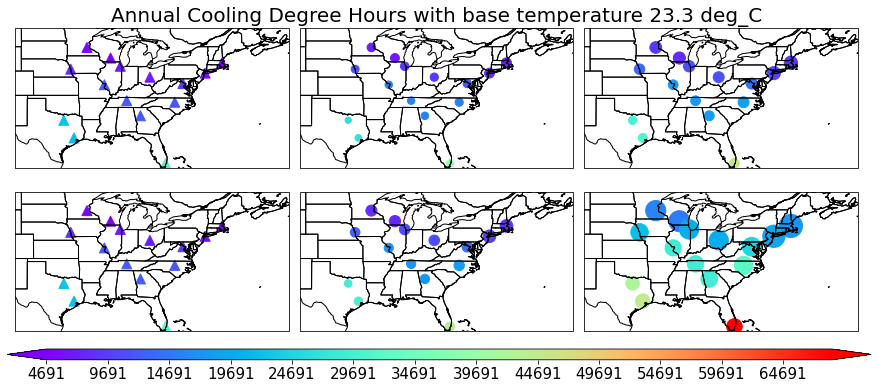

In [8]:
dplot45 = new_df45_cdh1
dplot85 = new_df85_cdh1

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))

list_colors = ['aquamarine','lightgreen','yellowgreen','goldenrod','orange','darkorange','orangered','red','darkred']
# new_cmap = LinearSegmentedColormap.from_list('new cmap',list_colors,N = 500)#len(list_colors)) 
new_cmap = 'rainbow'
data = list(dplot45['2020'])
for x in list(dplot85['2090']):
    data.append(x)
vmax,vmin = max(data),min(data)
# print(vmin,vmax)
scale = 2
    
ax1 = plt.subplot(2, 3, 1, projection=ccrs.PlateCarree())
ax1.set_extent([-105,-60,25, 48], ccrs.PlateCarree())
ax1.add_feature(cfeature.STATES)
ax1.coastlines()
# plt.title('CDH23.3 in 2090 under RCP 4.5',fontsize=20)
plt1 = ax1.scatter(dplot45.lon, dplot45.lat, 
           marker='^',
           s=100,
           c=dplot45['2020'],
           cmap=new_cmap,
           vmin=vmin,vmax=vmax,
           transform=ccrs.PlateCarree())
# fig.colorbar(plt1,orientation='horizontal')

ax2 = plt.subplot(2, 3, 2, projection=ccrs.PlateCarree())
ax2.set_extent([-105,-60,25, 48], ccrs.PlateCarree())
ax2.add_feature(cfeature.STATES)
ax2.coastlines()
# plt.title('CDH23.3 in 2090 under RCP 4.5',fontsize=20)
plt2 = ax2.scatter(dplot45.lon, dplot45.lat, 
           s=dplot45['2020-2050']*scale,
           c=dplot45['2050'],
           cmap=new_cmap,
           vmin=vmin,vmax=vmax,
           transform=ccrs.PlateCarree())

ax3 = plt.subplot(2, 3, 3, projection=ccrs.PlateCarree())
ax3.set_extent([-105,-60,25, 48], ccrs.PlateCarree())
ax3.add_feature(cfeature.STATES)
ax3.coastlines()
# plt.title('CDH23.3 in 2090 under RCP 4.5',fontsize=20)
plt3 = ax3.scatter(dplot45.lon, dplot45.lat, 
           s=dplot45['2020-2090']*scale,
           c=dplot45['2090'],
           cmap=new_cmap,
           vmin=vmin,vmax=vmax,
           transform=ccrs.PlateCarree())
# rcp85
ax4 = plt.subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4.set_extent([-105,-60,25, 48], ccrs.PlateCarree())
ax4.add_feature(cfeature.STATES)
ax4.coastlines()
# plt.title('CDH23.3 in 2090 under RCP 4.5',fontsize=20)
plt4 = ax4.scatter(dplot45.lon, dplot45.lat, 
           marker='^',
           s=100,
           c=dplot85['2020'],
           cmap=new_cmap,
           vmin=vmin,vmax=vmax,
           transform=ccrs.PlateCarree())

ax5 = plt.subplot(2, 3, 5, projection=ccrs.PlateCarree())
ax5.set_extent([-105,-60,25, 48], ccrs.PlateCarree())
ax5.add_feature(cfeature.STATES)
ax5.coastlines()
# plt.title('CDH23.3 in 2090 under RCP 4.5',fontsize=20)
plt5 = ax5.scatter(dplot45.lon, dplot45.lat, 
           s=dplot85['2020-2050']*scale,
           c=dplot85['2050'],
           cmap=new_cmap,
           vmin=vmin,vmax=vmax,
           transform=ccrs.PlateCarree())

ax6 = plt.subplot(2, 3, 6, projection=ccrs.PlateCarree())
ax6.set_extent([-105,-60,25, 48], ccrs.PlateCarree())
ax6.add_feature(cfeature.STATES)
ax6.coastlines()
# plt.title('CDH23.3 in 2090 under RCP 4.5',fontsize=20)
plt6 = ax6.scatter(dplot45.lon, dplot45.lat, 
           s=dplot85['2020-2090']*scale,
           c=dplot85['2090'],
           cmap=new_cmap,
           vmin=vmin,vmax=vmax,
           transform=ccrs.PlateCarree())

# fig.colorbar(plt2,orientation='horizontal')
cbaxes = fig.add_axes([0.003, 0.0005, 1, 0.03]) 
cb = plt.colorbar(plt1,cax = cbaxes,orientation='horizontal',ticks=np.arange(vmin,vmax,5000),extend='both')
cb.ax.tick_params(labelsize=15)

fig.suptitle('Annual Cooling Degree Hours with base temperature 23.3 deg_C',fontsize=20)
plt.tight_layout()
plt.show()

<b>#optimized 1st plot: abs value and percent change of CDH 23.3 in one plot <b/> 

In [9]:
# this function plot absolute value(color) and percentage change(size) in one plot 
def geoscatter(ax,dplot,decade,change): 
    ax = ax
    lat = dplot.lat
    lon = dplot.lon
    size = dplot[change]*scale
    color = dplot[decade]
    
    ax.set_extent([-105,-60,24,48], ccrs.PlateCarree())
    ax.add_feature(cfeature.STATES)
    ax.coastlines()
    plt = ax.scatter(lon,lat,
           s=size,
           c=color,
           cmap=new_cmap,
           vmin=vmin,vmax=vmax,
           transform=ccrs.PlateCarree())

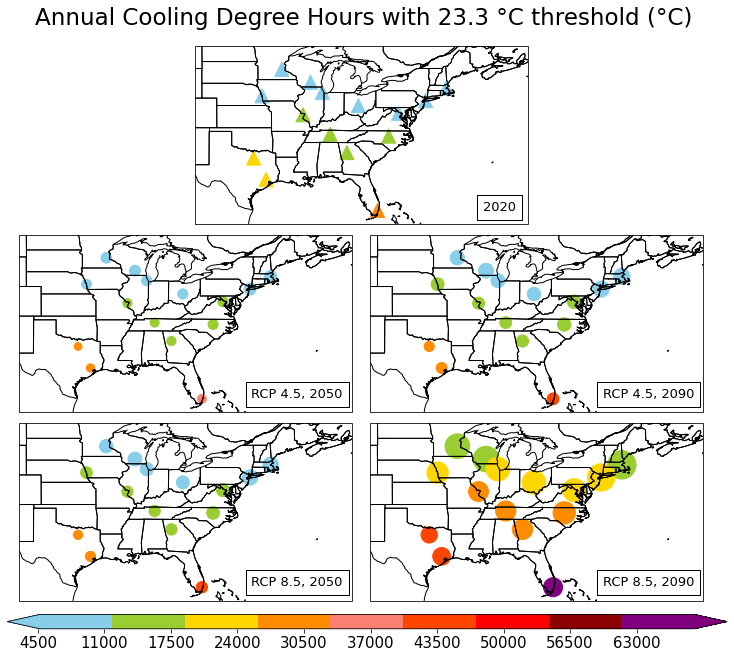

In [10]:
fig, axes = plt.subplots(figsize=(10,8))
# make a new color map 
list_colors = ['skyblue','yellowgreen','gold','darkorange','salmon','orangered','red','darkred','purple']
new_cmap = LinearSegmentedColormap.from_list('new_cmap',list_colors,N = len(list_colors)) 
# new_cmap = 'tab10'

# get range of color bar
data = list(dplot45['2020'])
for x in list(dplot85['2090']):
    data.append(x)
vmax,vmin = max(data),min(data)

scale = 3    
ax1 = plt.subplot(3,1,1, projection=ccrs.PlateCarree())

ax1.set_extent([-105,-60,24,48], ccrs.PlateCarree())
ax1.add_feature(cfeature.STATES)
ax1.coastlines()
plt1 = ax1.scatter(dplot45.lon, dplot45.lat, marker='^',
           s=200,
           c=dplot45['2020'],
           cmap=new_cmap,
           vmin=vmin,vmax=vmax,
           transform=ccrs.PlateCarree())
ax1.text(-66,25.8, '2020', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})

ax2 = plt.subplot(3,2,3, projection=ccrs.PlateCarree())
geoscatter(ax2,dplot45,'2050','2020-2050')
ax2.text(-73.6,26, 'RCP 4.5, 2050', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})

ax3 = plt.subplot(3,2,4, projection=ccrs.PlateCarree())
geoscatter(ax3,dplot45,'2090','2020-2090')
ax3.text(-73.6,26, 'RCP 4.5, 2090', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})

ax4 = plt.subplot(3,2,5, projection=ccrs.PlateCarree())
geoscatter(ax4,dplot85,'2050','2020-2050')
ax4.text(-73.6,26, 'RCP 8.5, 2050', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})

ax5 = plt.subplot(3,2,6, projection=ccrs.PlateCarree())
geoscatter(ax5,dplot85,'2090','2020-2090')
ax5.text(-73.6,26, 'RCP 8.5, 2090', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})

# fig.colorbar(plt1,orientation='horizontal')
cbaxes = fig.add_axes([0, -0.03, 1, 0.025]) 
cb = plt.colorbar(plt1,cax = cbaxes,orientation='horizontal',
                  ticks=np.arange(4500,65000,6500),extend='both')
cb.ax.tick_params(labelsize=15)

fig.suptitle('Annual Cooling Degree Hours with 23.3 °C threshold (°C) ',fontsize=23,y=1.05)
plt.tight_layout()
fig.savefig('results_plot/annualcdh233.png',dpi=fig.dpi,bbox_inches='tight')
plt.show()

<b>#2nd plot: only show percentage change in map  <b/> 
(used some functions to reduce code; specificied colorbar)

In [11]:
# this function plot either absolute value or percentage change(color), size does not give any information 
def geoscatter2(ax,dplot,val,new_cmap):
    ax = ax
    lat = dplot.lat
    lon = dplot.lon
    color = dplot[val]
    new_cmap = new_cmap
    
    ax.set_extent([-105,-60,24,48], ccrs.PlateCarree())
    ax.add_feature(cfeature.STATES,linewidth=0.6)
    ax.coastlines(linewidth=0.6)
    plt = ax.scatter(lon,lat,
           s=200,
           c=color,
           cmap=new_cmap,
           vmin=vmin,vmax=vmax,
           transform=ccrs.PlateCarree())
    return plt

19.88 268.92


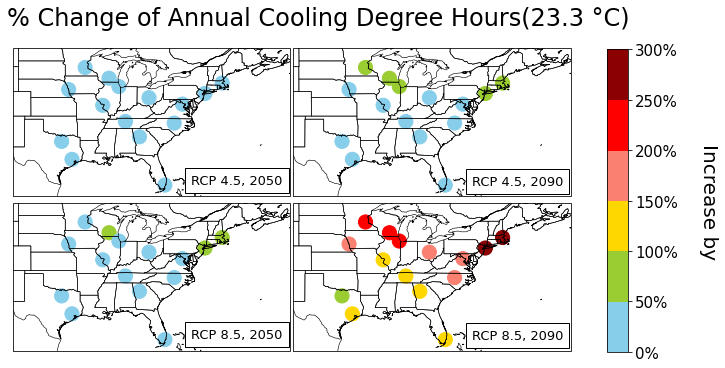

In [12]:
fig, axes = plt.subplots(figsize=(10,6))

# make a new color map 
list_colors = ['skyblue','yellowgreen','gold','salmon','red','darkred']
new_cmap = LinearSegmentedColormap.from_list('new_cmap',list_colors,N = len(list_colors)) 
# new_cmap = mpl.colors.ListedColormap(list_colors)
     
# set a common colormap
data = list(dplot45['2020-2050'])
for x in list(dplot85['2020-2090']):
    data.append(x)
vmax,vmin = max(data),min(data)
print(vmin,vmax)

scale = 6
 
ax1 = plt.subplot(2,2,1, projection=ccrs.PlateCarree())
p = geoscatter2(ax1,dplot45,'2020-2050',new_cmap) # use p to get the color bar info 
ax1.text(-76,26, 'RCP 4.5, 2050', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})

ax2 = plt.subplot(2,2,2, projection=ccrs.PlateCarree())
geoscatter2(ax2,dplot45,'2020-2090',new_cmap)
ax2.text(-76,25.9, 'RCP 4.5, 2090', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})

ax3 = plt.subplot(2,2,3, projection=ccrs.PlateCarree())
geoscatter2(ax3,dplot85,'2020-2050',new_cmap)
ax3.text(-76,26, 'RCP 8.5, 2050', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})

ax4 = plt.subplot(2,2,4, projection=ccrs.PlateCarree())
geoscatter2(ax4,dplot85,'2020-2090',new_cmap)
ax4.text(-76,25.9, 'RCP 8.5, 2090', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})


# colorbar set up
cbaxes = fig.add_axes([0.95, 0.15, 0.03, 0.7]) 
ticks = np.linspace(0, 300, num=7, endpoint=True)
cb = plt.colorbar(p,cax = cbaxes,orientation='vertical',ticks=ticks,boundaries=np.linspace(0, 300, 7))
label = [str(int(np.round(it,0)))+"%" for it in ticks]
cb.ax.set_yticklabels(label)                
cb.ax.tick_params(labelsize=15)
cb.set_label('Increase by',labelpad=40,rotation=270,fontsize=20)


fig.suptitle('% Change of Annual Cooling Degree Hours(23.3 °C)',fontsize=24,y=0.95,x=0.55)
# plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=-0.1)

fig.savefig('results_plot/annualcdh233_percentchange.png',dpi=fig.dpi,bbox_inches='tight')
plt.show()

28.5 80.11


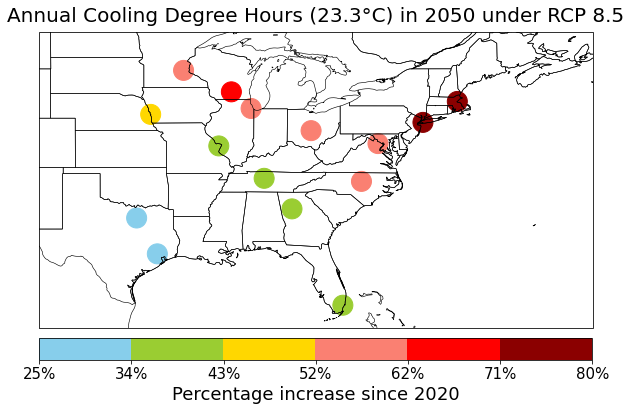

In [13]:
# this function plot either absolute value or percentage change(color), size does not give any information 

# fig = figure.Figure(figsize =(15,6))
fig, ax = plt.subplots(figsize =(8,5))
# plt.figure(figsize=(8,5))
# make a new color map 
list_colors = ['skyblue','yellowgreen','gold','salmon','red','darkred']
new_cmap = LinearSegmentedColormap.from_list('new_cmap',list_colors,N=len(list_colors)) 
     
# set a common colormap
data = list(dplot85['2020-2050'])
vmax,vmin = max(data),min(data)
print(vmin,vmax)


ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-105,-60,24,48], ccrs.PlateCarree())
ax.add_feature(cfeature.STATES,linewidth=0.6)
ax.coastlines(linewidth=0.6)
p = ax.scatter(dplot85.lon,dplot85.lat,
                 s=400,
                 c=dplot85['2020-2050'],
                 cmap=plt.get_cmap(new_cmap),
                 vmin=vmin,vmax=vmax,
                 transform=ccrs.PlateCarree())
#colorbar set up
cbaxes = fig.add_axes([0.02, 0.0, 0.96, 0.06]) 
ticks = np.linspace(25, 80, num=7, endpoint=True)
# cb = fig.colorbar(p,cax = cbaxes,orientation='horizontal')
cb = plt.colorbar(p,cax = cbaxes,orientation='horizontal',ticks=ticks,boundaries=np.linspace(25,80,7))

label = [str(int(np.round(it,0)))+"%" for it in ticks]
cb.ax.set_xticklabels(label)                
cb.ax.tick_params(labelsize=15)
cb.set_label('Percentage increase since 2020',fontsize=18)

fig.suptitle('Annual Cooling Degree Hours (23.3°C) in 2050 under RCP 8.5',fontsize=20)

    
plt.tight_layout()

fig.savefig('results_plot/annualcdh233_rcp85_2050.png',dpi=fig.dpi,bbox_inches='tight')
plt.show()

<b>#3rd plot: only show abls value of cdh in map<b/>

6551 68662


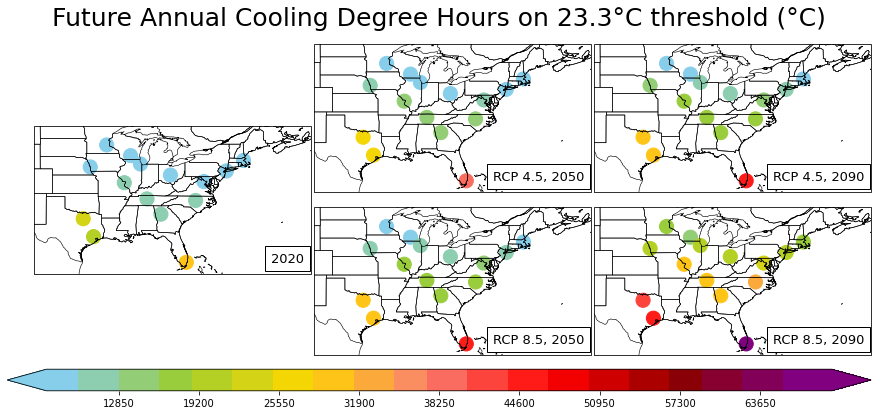

In [14]:
fig, axes = plt.subplots(figsize=(15,6))

# make a new color map 
list_colors = ['skyblue','yellowgreen','gold','salmon','red','darkred','purple']
new_cmap = LinearSegmentedColormap.from_list('new_cmap',list_colors,N = 20) 
# new_cmap = 'jet'
     
# set a common colormap
data = list(dplot45['2050'])
for x in list(dplot85['2090']):
    data.append(x)
vmax,vmin = max(data),min(data)
print(vmin,vmax)

ax1 = plt.subplot(1,3,1, projection=ccrs.PlateCarree())
p = geoscatter2(ax1,dplot45,'2020',new_cmap) # use p to get the color bar info 
ax1.text(-66.5,25.9, '2020', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})
    
ax2 = plt.subplot(2,3,2, projection=ccrs.PlateCarree())
p = geoscatter2(ax2,dplot45,'2050',new_cmap) # use p to get the color bar info 
ax2.text(-76,26, 'RCP 4.5, 2050', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})

ax3 = plt.subplot(2,3,3, projection=ccrs.PlateCarree())
geoscatter2(ax3,dplot45,'2090',new_cmap)
ax3.text(-76,26, 'RCP 4.5, 2090', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})

ax4 = plt.subplot(2,3,5, projection=ccrs.PlateCarree())
geoscatter2(ax4,dplot85,'2050',new_cmap)
ax4.text(-76,26, 'RCP 8.5, 2050', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})

ax5 = plt.subplot(2,3,6, projection=ccrs.PlateCarree())
geoscatter2(ax5,dplot85,'2090',new_cmap)
ax5.text(-76,26, 'RCP 8.5, 2090', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})


# colorbar set up
cbaxes = fig.add_axes([0.1, 0.06, 0.8, 0.05]) 
ticks = np.linspace(6500, 70000, num=11, endpoint=True)
cb = plt.colorbar(p,cax = cbaxes,orientation='horizontal',extend='both',
                  ticks=ticks,boundaries=np.linspace(6500,70000,100))
label = [str(int(np.round(it,0)))+"%" for it in ticks]
# cb.ax.set_yticklabels(label)                
# cb.ax.tick_params(labelsize=15)
# cb.set_label('Increase by',labelpad=40,rotation=270,fontsize=20)


fig.suptitle('Future Annual Cooling Degree Hours on 23.3°C threshold (°C)',fontsize=25,y=0.95)
# plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=0.0)
fig.savefig('results_plot/annualcdh233_future.png',dpi=fig.dpi,bbox_inches='tight')
plt.show()

<b>#4rd plot: spatial distribution of teh change of CDH23.3 and CDH 26.7<b/>

In [15]:
def geoscatter2(ax,dplot,val,new_cmap):
    ax = ax
    lat = dplot.lat
    lon = dplot.lon
    # since there is huge gap for the percent change, I used log change for a uniform colormap
    color = np.log(dplot[val]) 
    new_cmap = new_cmap
    
    ax.set_extent([-105,-60,24,48], ccrs.PlateCarree())
    ax.add_feature(cfeature.STATES,linewidth=0.6)
    ax.coastlines(linewidth=0.6)
    plt = ax.scatter(lon,lat,
           s=200,
           c=color,
           cmap=new_cmap,
           vmin=vmin,vmax=vmax,
           transform=ccrs.PlateCarree())
    return plt

2.989714201228428 6.222318298292089


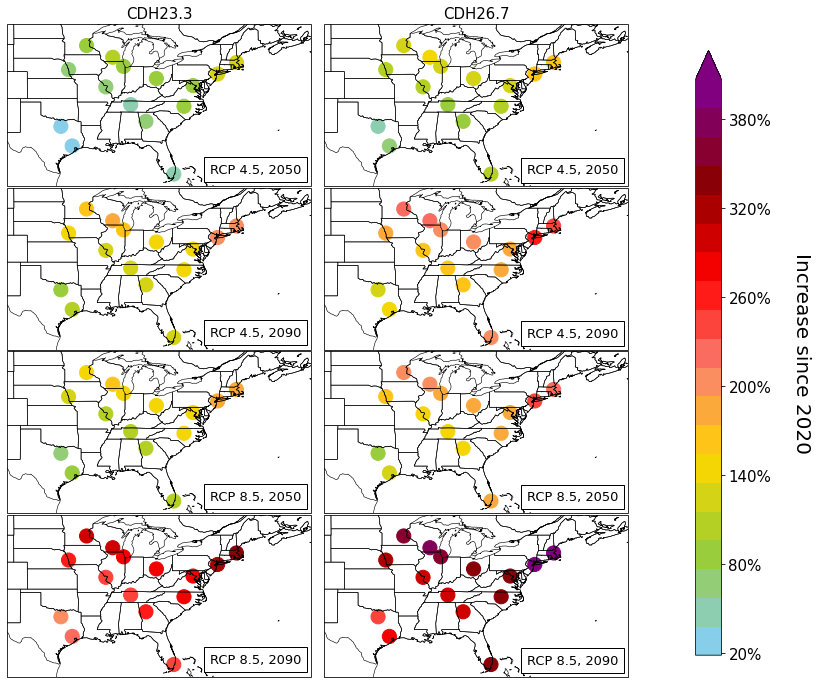

In [16]:
fig, axes = plt.subplots(figsize=(12,12))

# make a new color map 
list_colors = ['skyblue','yellowgreen','gold','salmon','red','darkred','purple']
new_cmap = LinearSegmentedColormap.from_list('new_cmap',list_colors,N=20 ) 
# new_cmap = "viridis"  
# set a common colormap
data = list(new_df45_cdh1['2020-2050'])+list(new_df45_cdh2['2020-2090'])+list(new_df85_cdh1['2020-2050'])+list(new_df85_cdh2['2020-2090'])
data = np.log(data)
vmax,vmin = max(data),min(data)
print(vmin,vmax)
scale = 4

# plots for rcp4.5 
ax1 = plt.subplot(4,2,1, projection=ccrs.PlateCarree())
p = geoscatter2(ax1,new_df45_cdh1,'2020-2050',new_cmap) # use p to get the color bar info 
ax1.text(-75,26, 'RCP 4.5, 2050', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})
plt.title("CDH23.3",fontsize=15)

ax2 = plt.subplot(4,2,2, projection=ccrs.PlateCarree())
geoscatter2(ax2,new_df45_cdh2,'2020-2050',new_cmap)
ax2.text(-75,25.9, 'RCP 4.5, 2050', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})
plt.title("CDH26.7",fontsize=15)

ax3 = plt.subplot(4,2,3, projection=ccrs.PlateCarree())
geoscatter2(ax3,new_df45_cdh1,'2020-2090',new_cmap)
ax3.text(-75,26, 'RCP 4.5, 2090', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})

ax4 = plt.subplot(4,2,4, projection=ccrs.PlateCarree())
geoscatter2(ax4,new_df45_cdh2,'2020-2090',new_cmap)
ax4.text(-75,25.9, 'RCP 4.5, 2090', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})


# plots for rcp8.5 
ax5 = plt.subplot(4,2,5, projection=ccrs.PlateCarree())
p = geoscatter2(ax5,new_df85_cdh1,'2020-2050',new_cmap) # use p to get the color bar info 
ax5.text(-75,26, 'RCP 8.5, 2050', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})

ax6 = plt.subplot(4,2,6, projection=ccrs.PlateCarree())
geoscatter2(ax6,new_df85_cdh2,'2020-2050',new_cmap)
ax6.text(-75,25.9, 'RCP 8.5, 2050', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})

ax7 = plt.subplot(4,2,7, projection=ccrs.PlateCarree())
geoscatter2(ax7,new_df85_cdh1,'2020-2090',new_cmap)
ax7.text(-75,26, 'RCP 8.5, 2090', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})

ax8 = plt.subplot(4,2,8, projection=ccrs.PlateCarree())
geoscatter2(ax8,new_df85_cdh2,'2020-2090',new_cmap)
ax8.text(-75,25.9, 'RCP 8.5, 2090', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})




# colorbar set up
cbaxes = fig.add_axes([0.95, 0.15, 0.03, 0.7]) 

ticks = np.linspace(20,500, num=9, endpoint=True)
ticks = np.log(ticks)
cb = plt.colorbar(p,cax=cbaxes,orientation='vertical',extend='max')
# cb = plt.colorbar(p,cax = cbaxes,orientation='vertical',ticks=ticks)

label = [str(int(np.round(it,0)))+"%" for it in np.exp(ticks)]
cb.ax.set_yticklabels(label,minor=False)                
cb.ax.tick_params(labelsize=15)
cb.set_label('Increase since 2020',labelpad=40,rotation=270,fontsize=20)


# fig.suptitle('% Change of Annual Cooling Degree Hours(23.3 °C)',fontsize=24,y=0.95,x=0.55)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=-0.1, hspace=0.01)

fig.savefig('results_plot/annualcdhchange_spatialdistribution.png',dpi=fig.dpi,bbox_inches='tight')
plt.show()

In [20]:
new_df45_cdh2


,city,lat,lon,2020,2050,2090,2020-2050,2020-2090
0,MADISON,43.14,-89.35,1555,2450,3313,57.56,113.05
1,MINNEAPOLIS,44.88,-93.23,1917,2892,3886,50.86,102.71
2,WASHINGTONDC,38.94,-77.45,3780,5526,6967,46.19,84.31
3,MIAMI,25.82,-80.30,11230,16183,21022,44.11,87.20
4,COLUMBUS,39.99,-82.88,2556,3765,4749,47.30,85.80
5,STLOUIS,38.75,-90.37,5307,7401,8949,39.46,68.63
6,RALEIGH,35.87,-78.79,5098,7346,9281,44.10,82.05
7,NASHVILLE,36.12,-86.69,5100,6911,8342,35.51,63.57
8,ATLANTA,33.64,-84.43,4785,6590,8007,37.72,67.34
9,BOSTON,42.36,-71.01,1705,2825,3833,65.69,124.81
